In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# EDA🔎🧹

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### About Data 


- Survived: 1 =Yes , 1 = no   
- pclass: Ticket class1 = 1st, 2 = 2nd, 3 = 3rd  
- sibsp:num of siblings / spouses aboard the Titanic  	
- parch:num of parents / children aboard the Titanic  	
- ticket:Ticket number
- cabin:Cabin number
- embarked:Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
   

In [5]:
train.shape

(891, 12)

In [6]:
test.shape 

(418, 11)

In [7]:
len(train)

891

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# null in age , Cabin and Embarked
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# null in Age ,Cabin and Fare  
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# only numerical 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing Value 

In train , We have 177 missing values in age , 687 in cabin and 2 in embarked

In test , we have 86 in age , 327 in cabin and 1 in fare 

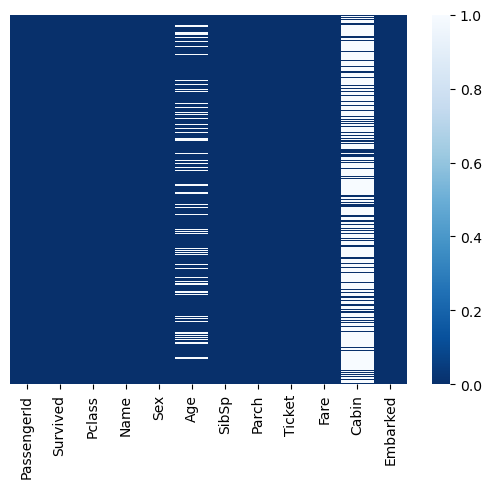

In [12]:
# heatmap for missing values
sns.heatmap(train.isnull(),yticklabels=False, cmap="Blues_r")
plt.show()

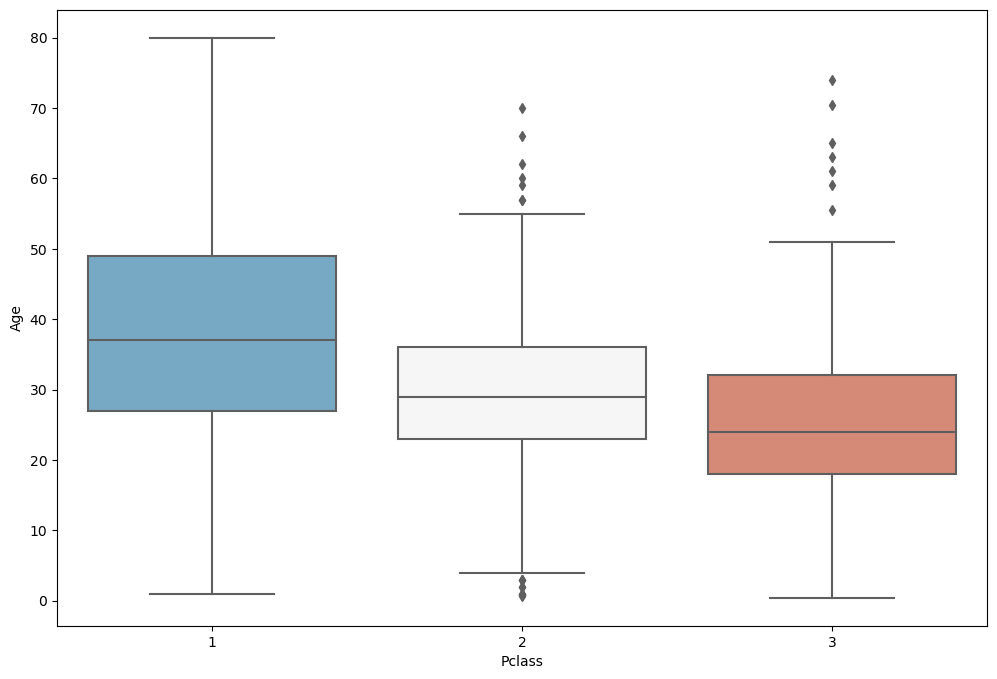

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age',palette='RdBu_r', data=train)
plt.show()


In [14]:
train.drop('Cabin', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)


In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [16]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
# nun value 
from sklearn.impute import SimpleImputer
impute = train.isna().sum()
Impute = SimpleImputer(strategy="median")
test['Fare'] = Impute.fit_transform(test['Fare'].to_numpy().reshape((-1, 1)))
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].mode()[0], inplace=True)
test['Age'] = Impute.fit_transform(test['Age'].to_numpy().reshape((-1, 1)))


In [18]:
train["Embarked"].isnull().sum()

0

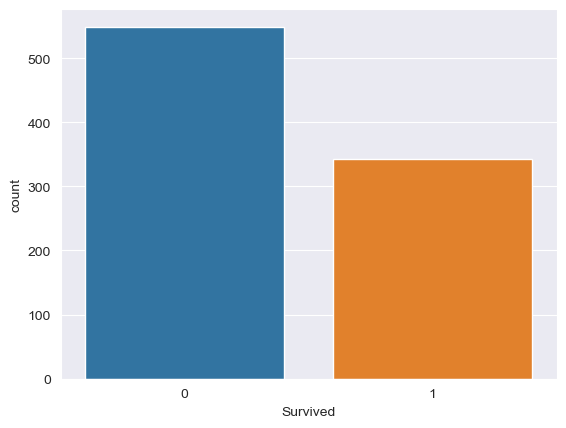

In [19]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=train)
plt.show()

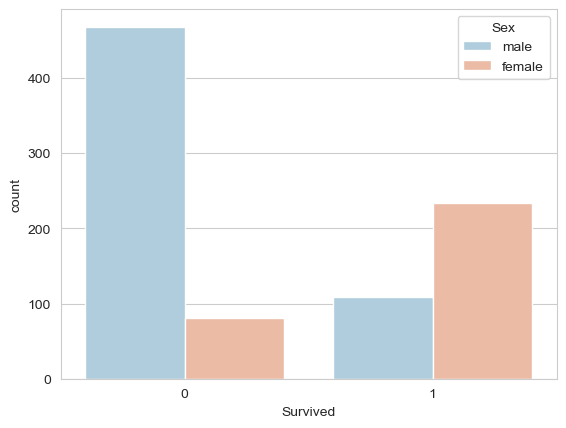

In [20]:
# how many men and women are survived  
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Sex',data=train, palette='RdBu_r')
plt.show()

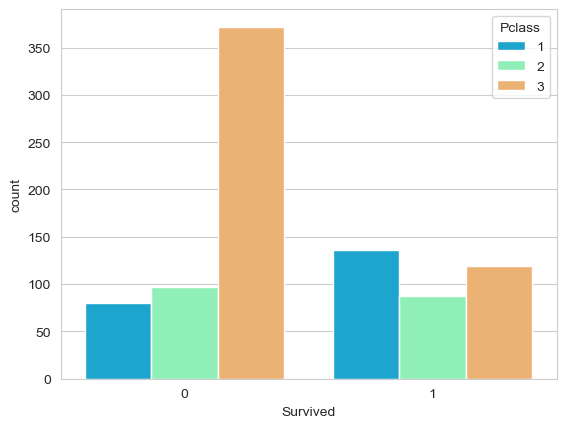

In [21]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Pclass',data=train, palette='rainbow')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


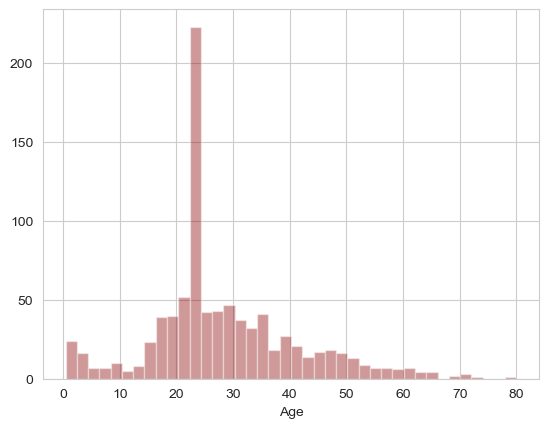

In [22]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40,color="darkred")
plt.show()

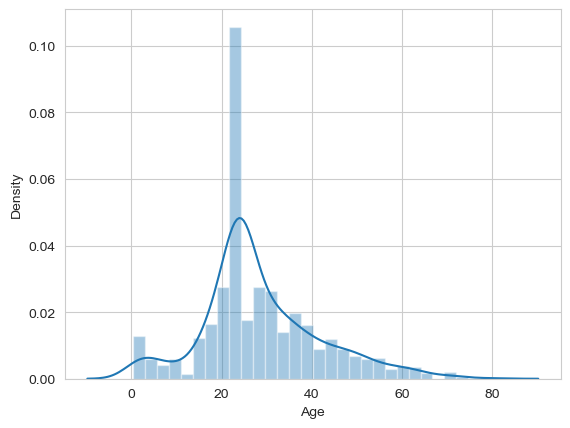

In [23]:
sns.distplot(train['Age'])
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

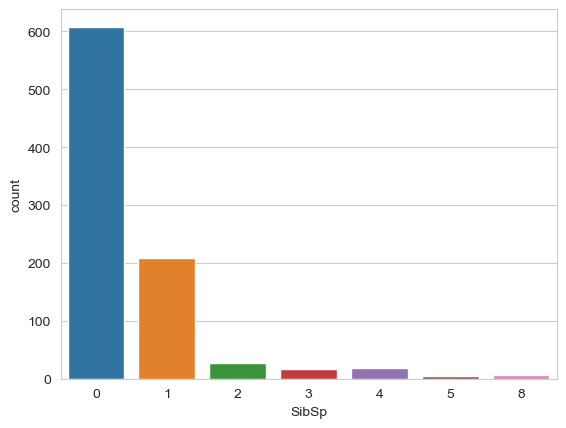

In [24]:
sns.countplot(x='SibSp', data=train)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


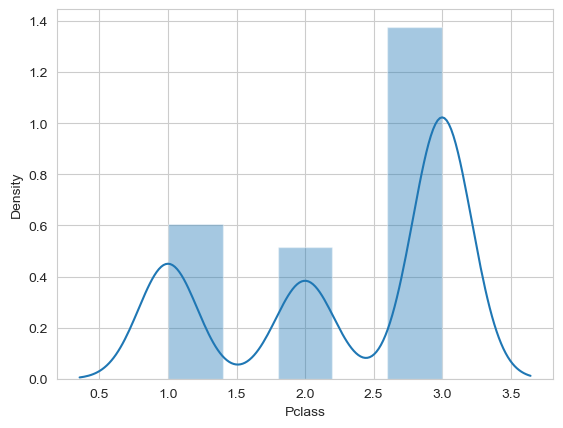

In [25]:
sns.distplot(train['Pclass'] ,bins=5, norm_hist=True)
plt.show()

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

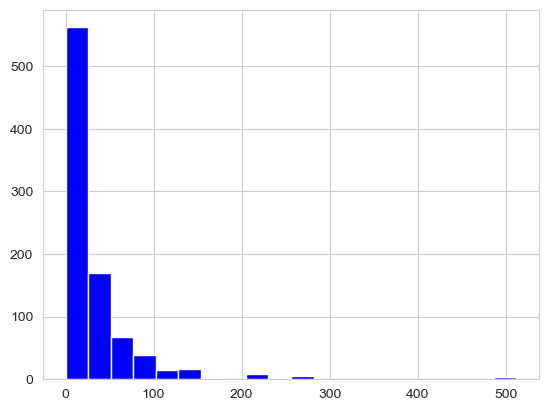

In [27]:
train['Fare'].hist(color='blue',bins =20)
plt.show()

In [28]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

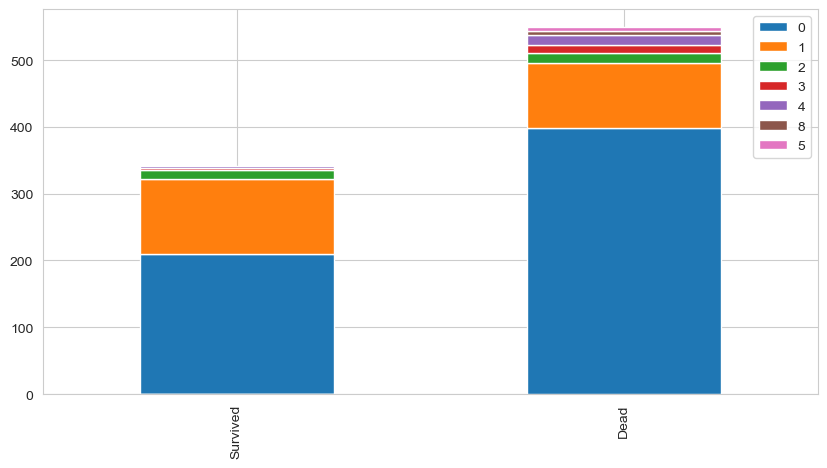

In [29]:
bar_chart('SibSp')

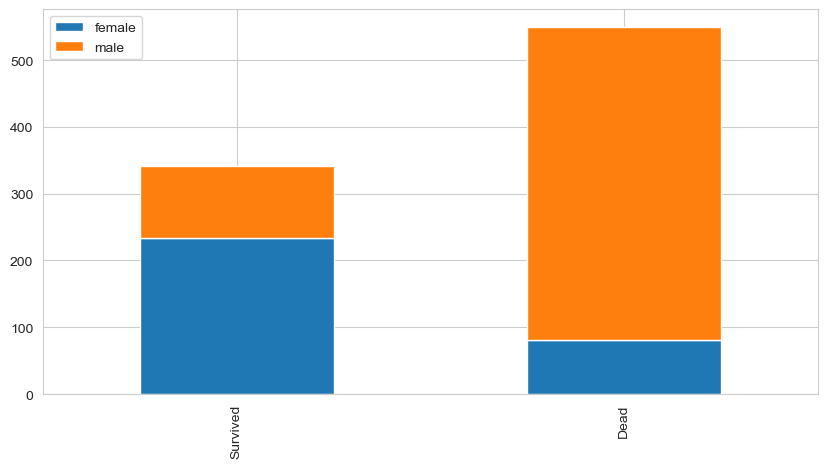

In [30]:
bar_chart('Sex')

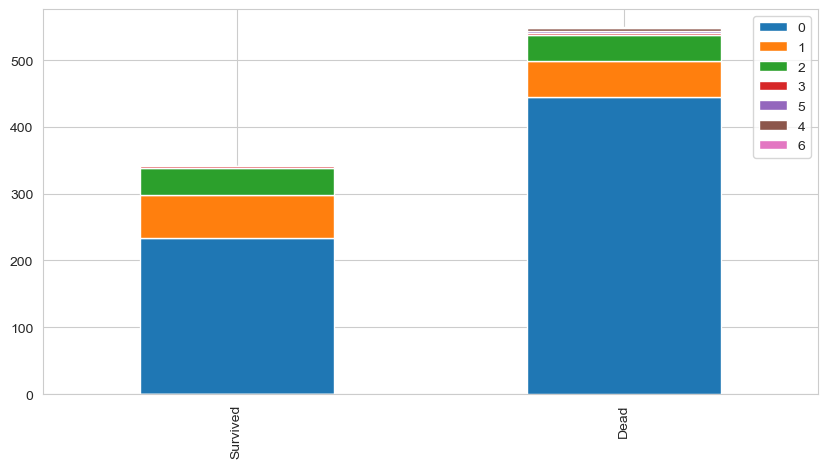

In [31]:
bar_chart('Parch')

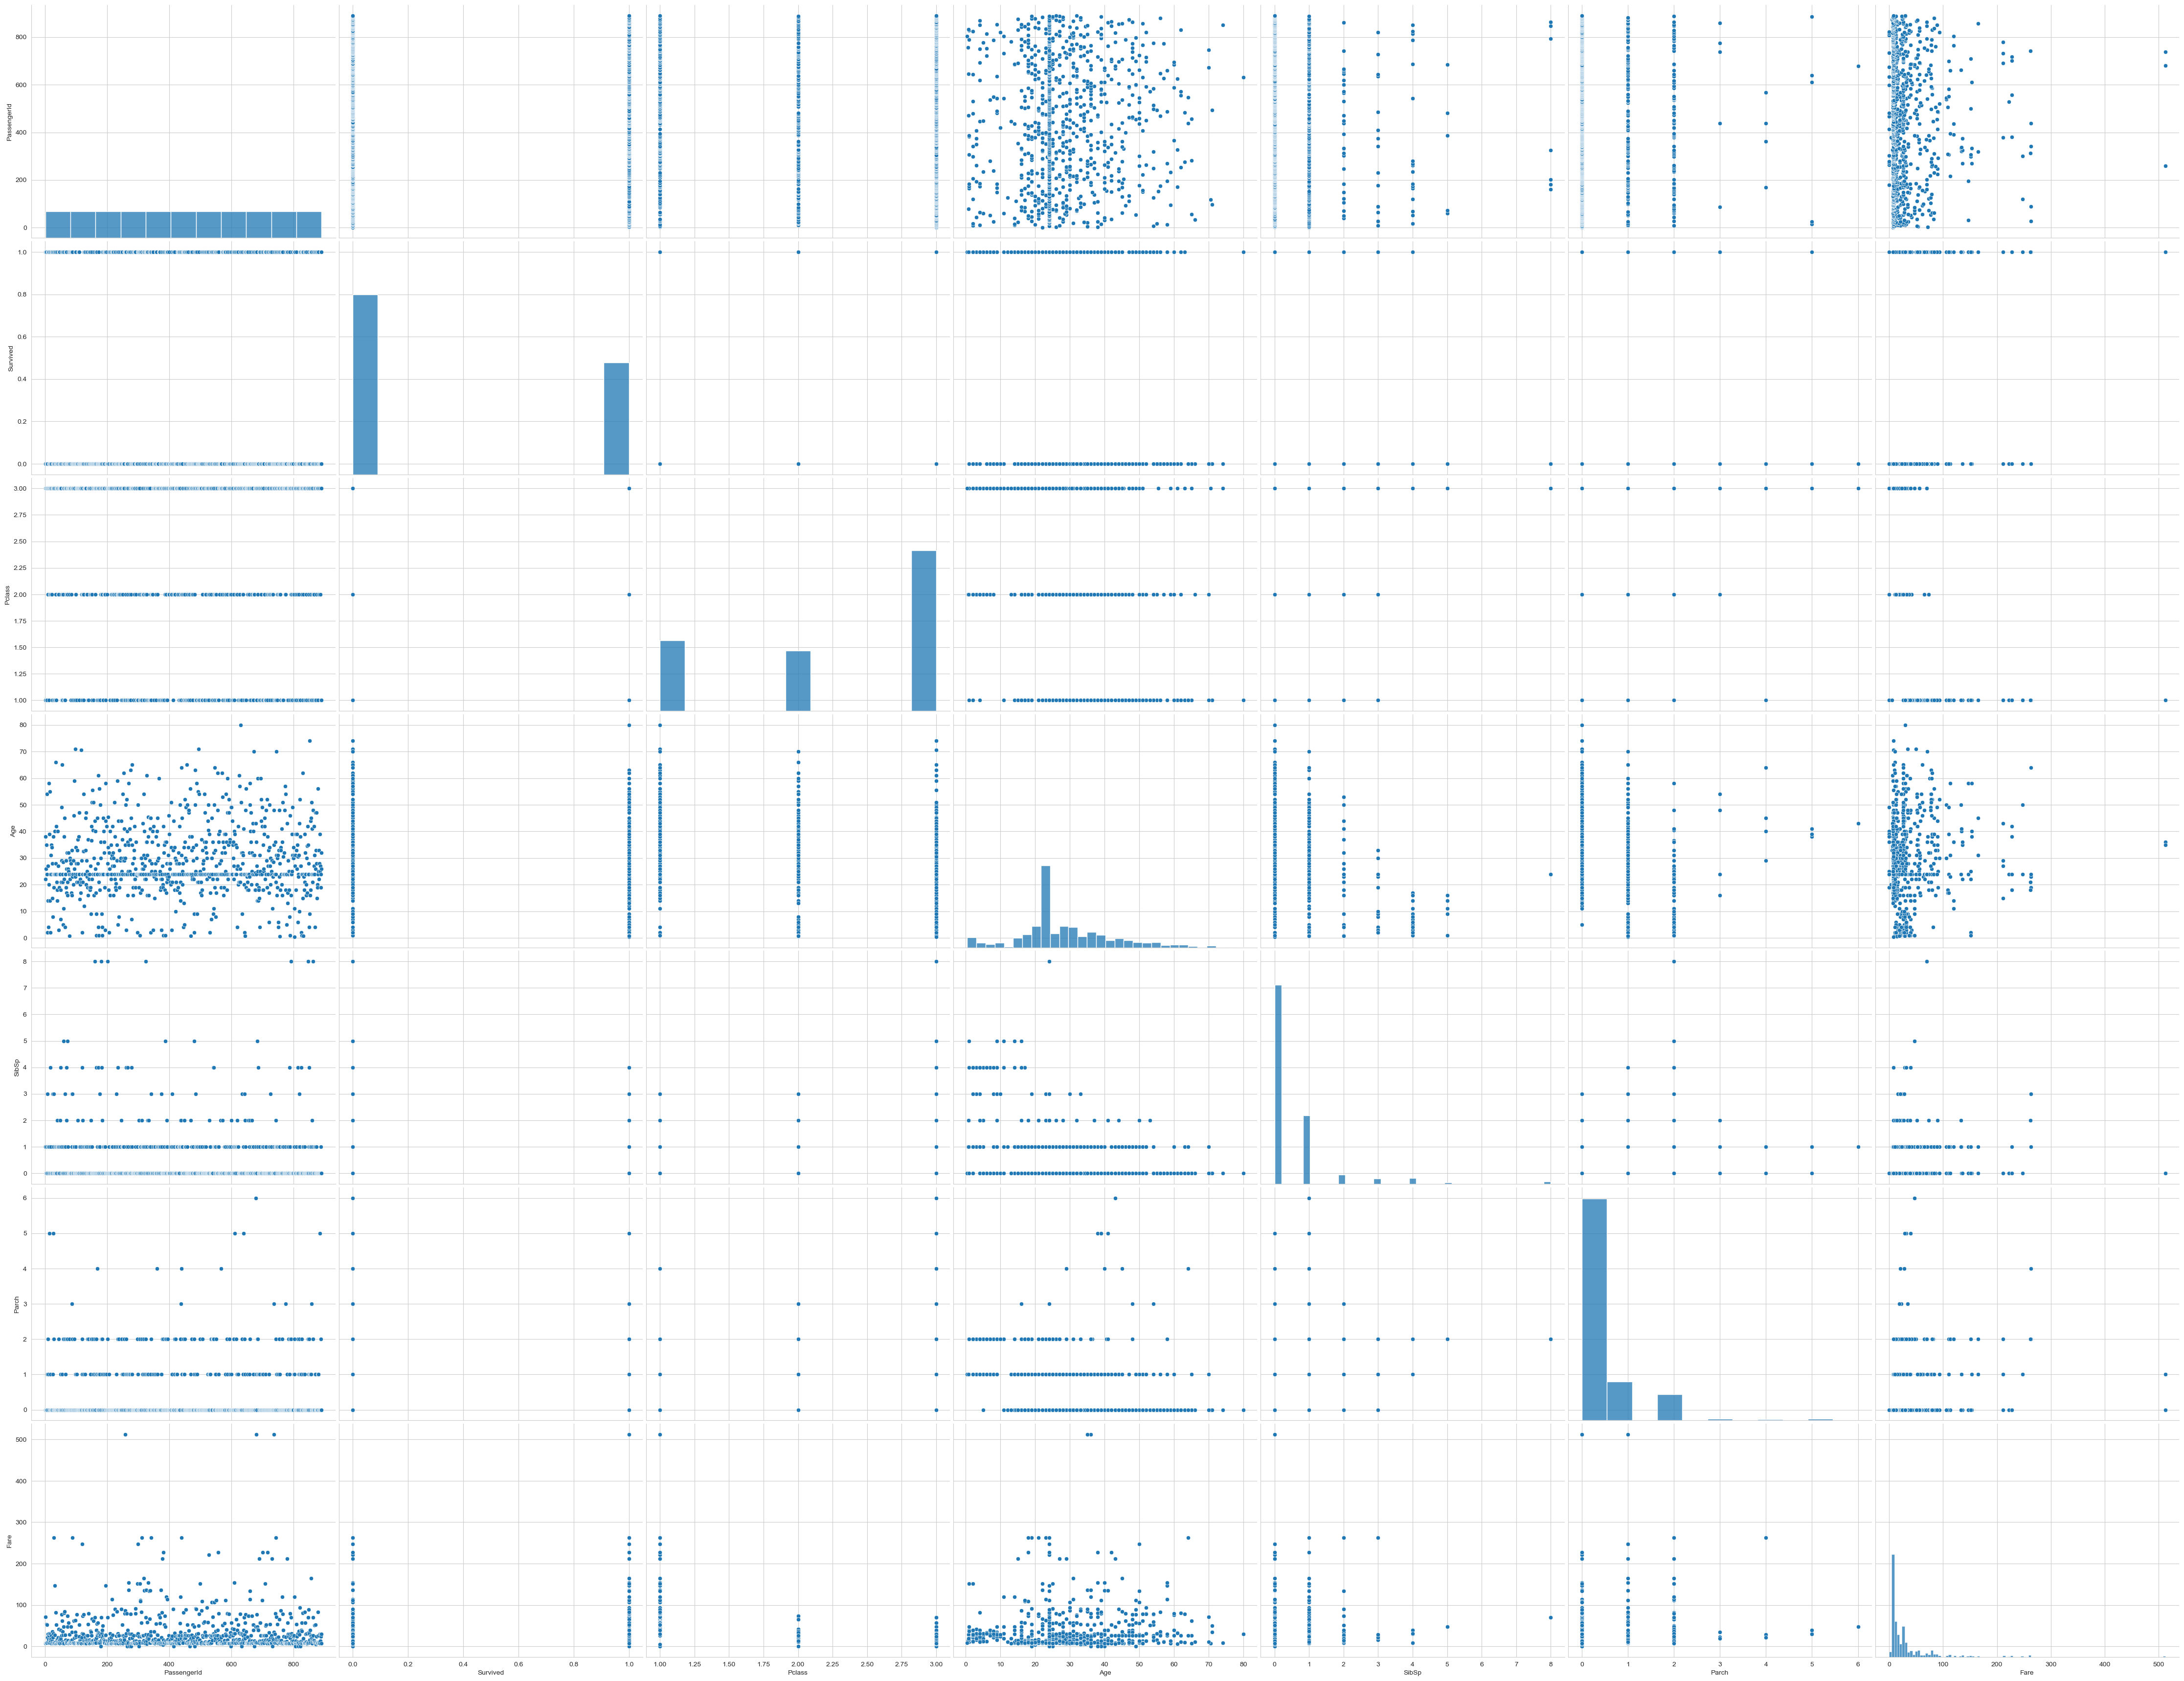

In [32]:
sns.pairplot(train, height=5, aspect=1.3)
plt.show()

In [33]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked']
train_data = train[col] 

<AxesSubplot:>

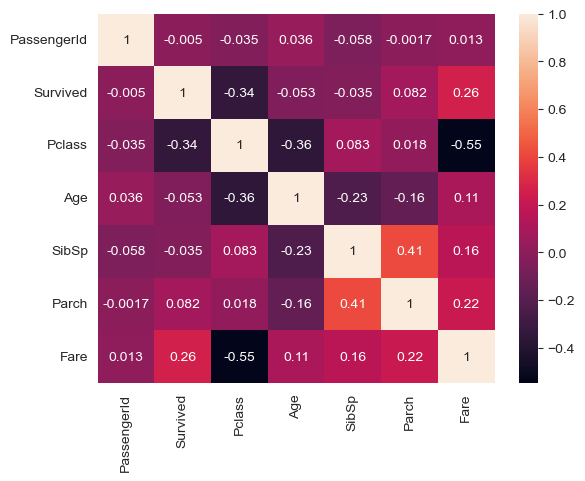

In [34]:
sns.heatmap(train.corr(),annot=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train['Sex'] = label.fit_transform(train['Sex'])
train['Embarked'] = label.fit_transform(train['Embarked'])
test['Sex'] = label.fit_transform(test['Sex'])
test['Embarked'] = label.fit_transform(test['Embarked'])

In [36]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
train.loc[:, ['Age', 'Fare']] = minmax.fit_transform(train.loc[:, ['Age', 'Fare']])
test.loc[:, ['Age', 'Fare']] = minmax.fit_transform(test.loc[:, ['Age', 'Fare']])

In [37]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,0.014151,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,0.139136,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,0.015469,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,0.103644,2


In [38]:
train.drop(['Name'], axis=1, inplace=True)

test.drop(['Name'], axis=1, inplace=True)

In [39]:
train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0.271174,1,0,0.014151,2
1,2,1,1,0,0.472229,1,0,0.139136,0
2,3,1,3,0,0.321438,0,0,0.015469,2
3,4,1,1,0,0.434531,1,0,0.103644,2


In [40]:
test.head(4)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.452723,0,0,0.015282,1
1,893,3,0,0.617566,1,0,0.013663,2
2,894,2,1,0.815377,0,0,0.018909,1
3,895,3,1,0.353818,0,0,0.016908,2


In [41]:
train['Age'].replace('NaN','0')

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.296306
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [43]:
train = train.astype("float64")
test = test.astype("float64")

In [44]:
train.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked       float64
dtype: object

In [45]:
test.dtypes

PassengerId    float64
Pclass         float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked       float64
dtype: object

# Split Data

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30,random_state=101)

In [47]:
X_train.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
520,521.0,1.0,0.0,0.371701,0.0,0.0,0.182500,2.0
510,511.0,3.0,1.0,0.359135,0.0,0.0,0.015127,1.0


# ML Model 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Logistic Regression

In [49]:
model=LogisticRegression()

In [72]:
import warnings
warnings.filterwarnings('ignore')
model.fit(X_train,y_train)

LogisticRegression()

In [51]:
# Accuracy of training data
X_train_Prediction=model.predict(X_train)


In [52]:
from sklearn.metrics import accuracy_score
train_data_accuracy=accuracy_score(y_train,X_train_Prediction)


In [53]:
train_data_accuracy

0.812199036918138

In [71]:
import warnings
warnings.filterwarnings('ignore')
model.fit(X_test,y_test)

LogisticRegression()

In [55]:
X_test_Prediction=model.predict(X_test)

In [56]:
test_data_accuracy=accuracy_score(y_test,X_test_Prediction)
test_data_accuracy

0.7574626865671642

In [69]:

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train.ravel())
Y_predict = lr.predict(X_test)
Y_predict = np.array(Y_predict)
Y_prediction = np.array(test['PassengerId'])
lr1 = lr.score(X_train, y_train)

In [70]:
lr1

0.8170144462279294

 # K 

In [57]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# KNN

In [58]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [59]:
import warnings
warnings.filterwarnings('ignore')
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
plt.show()

[0.5        0.61797753 0.52808989 0.58426966 0.61797753 0.56179775
 0.49438202 0.56179775 0.5505618  0.47191011]


In [60]:
round(np.mean(score))

1

# Decision Tree

In [61]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.76404494 0.76404494 0.71910112 0.74157303 0.75280899
 0.74157303 0.74157303 0.78651685 0.7752809 ]


In [62]:
round(np.mean(score))

1

# GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [64]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, random_state=100, max_features=5)
Y_prediction = np.array(test['PassengerId'])
gbc.fit(X_train, y_train.ravel())
Y_predict = gbc.predict(X_test)
gbc1 = gbc.score(X_train, y_train)

In [65]:
gbc1

0.9646869983948636

# Random Forest Classifier

In [66]:
Rf = RandomForestClassifier(n_jobs=-1, n_estimators=500, random_state=100, max_features=5)
Y_prediction = np.array(test['PassengerId'])
Rf.fit(X_train, y_train.ravel())
Y_predict = Rf.predict(X_test)
rf1 = Rf.score(X_train, y_train)

In [67]:
rf1

1.0

# Prediction Results

In [73]:
models = pd.DataFrame({'Model': ['Logistic Regression','Random Forest', 'Gradient Booster'],'Score': [lr1, rf1, gbc1]})
sorted_model=models.sort_values(by='Score', ascending=False)
print(sorted_model)

                 Model     Score
1        Random Forest  1.000000
2     Gradient Booster  0.964687
0  Logistic Regression  0.817014


# The Random Forest Classification scored the highest accuracy score of 0.964687 which is the most accurate one